In [130]:
import numpy as np
import matplotlib.pyplot as plt
import dtuimldmtools as dtu
from scipy import stats
import itertools

# Seeds project

In [131]:
data_path = "data/"
seeds_dataset = "seeds_dataset.txt"
dataset_file = data_path + seeds_dataset

### Import data

In [132]:
data = np.loadtxt(dataset_file)
# Validate shape of the dataset, 210 rows with 8 attributes
data.shape

(210, 8)

### Convert dataset based on course conventions
![Course conventions](images/course_conventions.png)

#### Data Fields
Dataset obtained from https://archive.ics.uci.edu/dataset/236/seeds 
* area_A: tensor containing an area of the wheat grains
* perimeter_P: tensor containing the perimeter of the wheat grains
* compactness_C: tensor containing compactness of the wheat grains
* length_of_kernel: tensor containing the length of each wheat kernel
* width_of_kernel: tensor containing the width of each wheat kernel
* asymmetry_coefficient: tensor containing asymmetry coefficient of a wheat kernel
* length_of_kernel_groove: tensor containing a length of a kernel groove

In [133]:
X = data
# attributeNames are not present in the dataset, just gonna hardcode based on the website
attributeNames = ["area_A", "perimeter_P", "compactness_C", "length_of_kernel", "width_of_kernel", "asymmetry_coefficient", "length_of_kernel_groove", "class"]
N = data.shape[0]
M = data.shape[1]
y = X[:, -1]
# This is derived from the website
classNames = ["Kama", "Rosa", "Canadian"]
C = len(classNames)
attributeNames, N, M, y, y.shape, classNames, C

(['area_A',
  'perimeter_P',
  'compactness_C',
  'length_of_kernel',
  'width_of_kernel',
  'asymmetry_coefficient',
  'length_of_kernel_groove',
  'class'],
 210,
 8,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

## Edit class labels, ensure zero indexing 

In [134]:
X[:, -1] -= 1
X.shape, X[:, -1]

((210, 8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.]))

## Summary statistics

In [135]:
# Get mean, standard deviation and range for all attributes(Except labels)
for i in range(M-1):
    mean = np.mean(X[:, i])
    std = np.std(X[:, i])
    attribute_range = np.ptp(X[:, i])
    print(f"{attributeNames[i]}: mean is {mean}, std is {std} and range is {attribute_range}")


area_A: mean is 14.84752380952381, std is 2.902763307757227 and range is 10.59
perimeter_P: mean is 14.559285714285714, std is 1.3028455904876302 and range is 4.84
compactness_C: mean is 0.8709985714285714, std is 0.023573088931421515 and range is 0.11019999999999996
length_of_kernel: mean is 5.6047238095238106, std is 0.556793891852753 and range is 5.966
width_of_kernel: mean is 3.258604761904762, std is 0.3768140516237867 and range is 1.4030000000000005
asymmetry_coefficient: mean is 3.700200952380953, std is 1.499972960930597 and range is 7.690899999999999
length_of_kernel_groove: mean is 5.408071428571429, std is 0.49030891102578633 and range is 2.0309999999999997


## Basic plots

### Plot attribute pairs

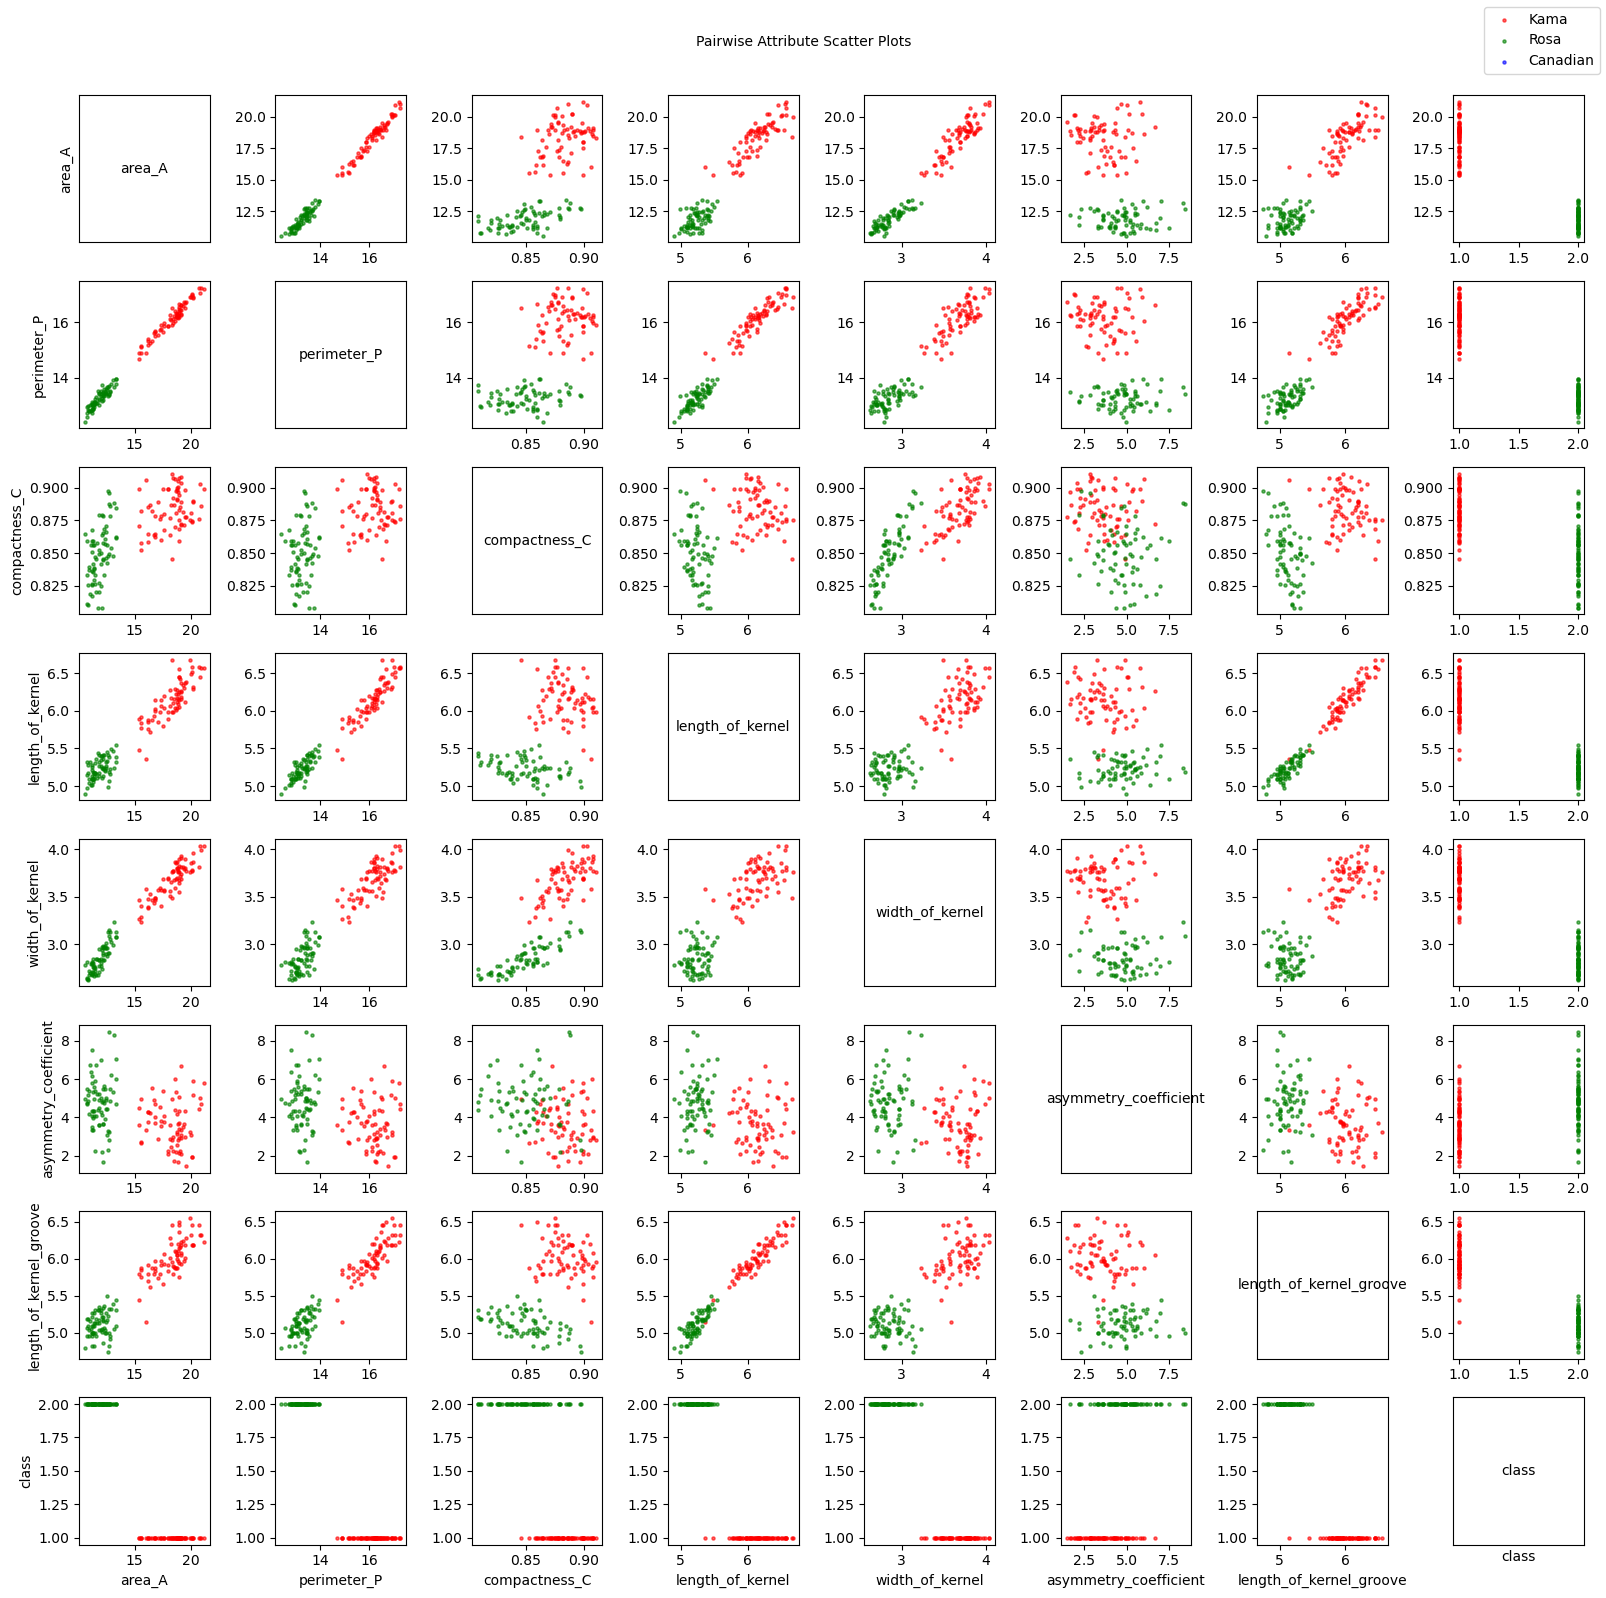

In [136]:
num_attributes = len(attributeNames)
colors = ["r", "g", "b"]
fig, axes = plt.subplots(num_attributes, num_attributes, figsize=(16, 16))
plt.suptitle("Pairwise Attribute Scatter Plots", fontsize=10)

# Loop through all attribute pairs
for i, j in itertools.product(range(num_attributes), repeat=2):
    ax = axes[i, j]

    # If same attribute, write its name in the middle
    if i == j:
        ax.text(
            0.5,
            0.5,
            attributeNames[i],
            fontsize=10,  # TODO Based on our use case, y.shape can be either (210, ) or (210, 1)
            ha="center",
            va="center",
        )
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        # Plot scatter points for each class
        for c, color in zip(range(1, 4), colors):  # Class labels are 1,2,3
            mask = y == c  # Boolean mask for class c
            ax.scatter(
                X[mask, j], X[mask, i], label=classNames, color=color, alpha=0.6, s=5
            )

    # Set axis labels only on the edges
    if j == 0:
        ax.set_ylabel(attributeNames[i])
    if i == num_attributes - 1:
        ax.set_xlabel(attributeNames[j])

fig.legend(classNames)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("images/pairwiseplot.png")
plt.show()

### 3D scatter plot

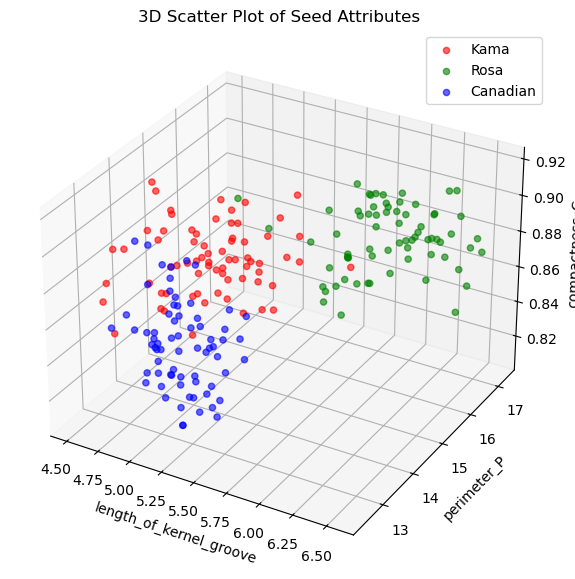

In [137]:
# Create a new figure for the 3D scatter plot
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection="3d")

# Choose three attributes (modify indices as needed)
a, b, d = 6, 1, 2  # Example: First three attributes

# Plot each class separately
for c1, color1 in zip(range(3), colors):  # Classes are labeled 1, 2, 3
    mask = y == c1
    ax1.scatter(X[mask, a], X[mask, b], X[mask, d], color=color1, alpha=0.6, s=20)

# Labels and title
ax1.set_xlabel(attributeNames[a])
ax1.set_ylabel(attributeNames[b])
ax1.set_zlabel(attributeNames[d])
ax1.set_title("3D Scatter Plot of Seed Attributes")
ax1.legend(classNames)
plt.savefig("images/3dscatter.png")
plt.show()

### Histogram

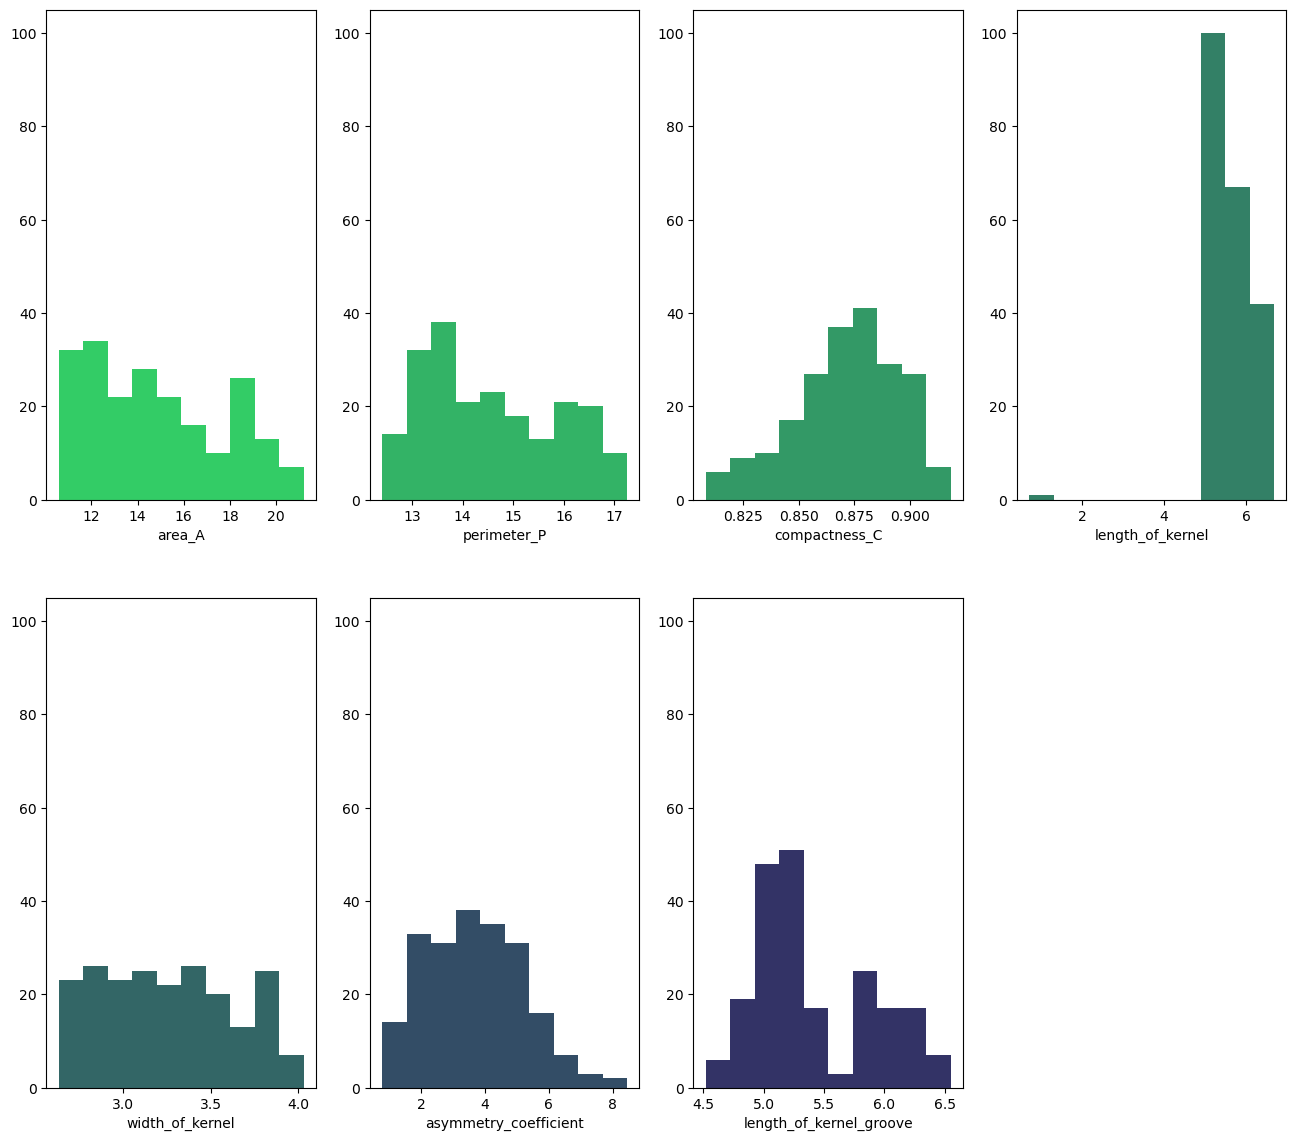

In [138]:
plt.figure(figsize=(16, 14))
# Exclude the last data point because not necessary to plot classes in histogram
numData = M - 1 
u = np.floor(np.sqrt(numData))
v = np.ceil(float(numData) / u)
for i in range(numData):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i], color=(0.2, 0.8 - i * 0.1, 0.4))
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N / 2)

plt.savefig("images/histogram.png")
plt.show()

## Remove outlier from the seed with extremely low kernel length

In [139]:
attribute_index = attributeNames.index("length_of_kernel")
lowest_index = np.argmin(X[:, 3])
X_updated = np.delete(X, lowest_index, axis=0)
y = np.delete(y, lowest_index, axis=0)
N -= 1
N, X_updated.shape, y.shape

(209, (209, 8), (209,))

### Corrected histogram

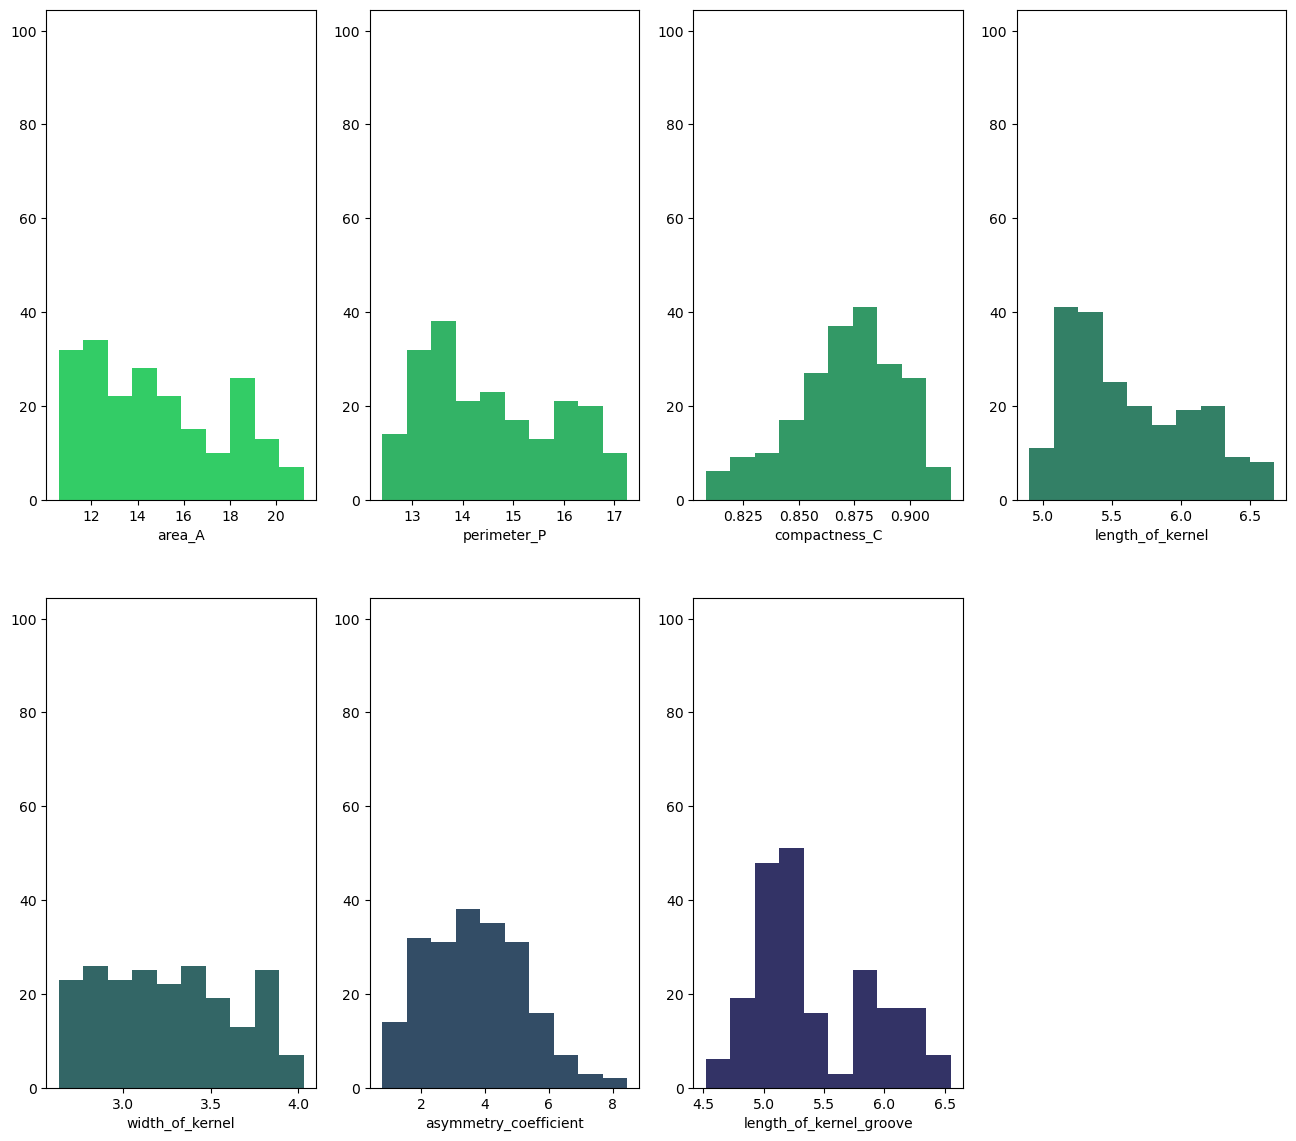

In [140]:
plt.figure(figsize=(16, 14))
# Exclude the last data point because not necessary to plot classes in histogram
numData = M - 1
u = np.floor(np.sqrt(numData))
v = np.ceil(float(numData) / u)
for i in range(numData):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X_updated[:, i], color=(0.2, 0.8 - i * 0.1, 0.4))
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N / 2)

plt.savefig("images/histogram.png")
plt.show()

### Standardize data

In [141]:
# Standardize the data
X_mean = np.mean(X_updated, axis=0)
X_std = np.std(X_updated, axis=0)
X_standardized = (X_updated - X_mean) / X_std

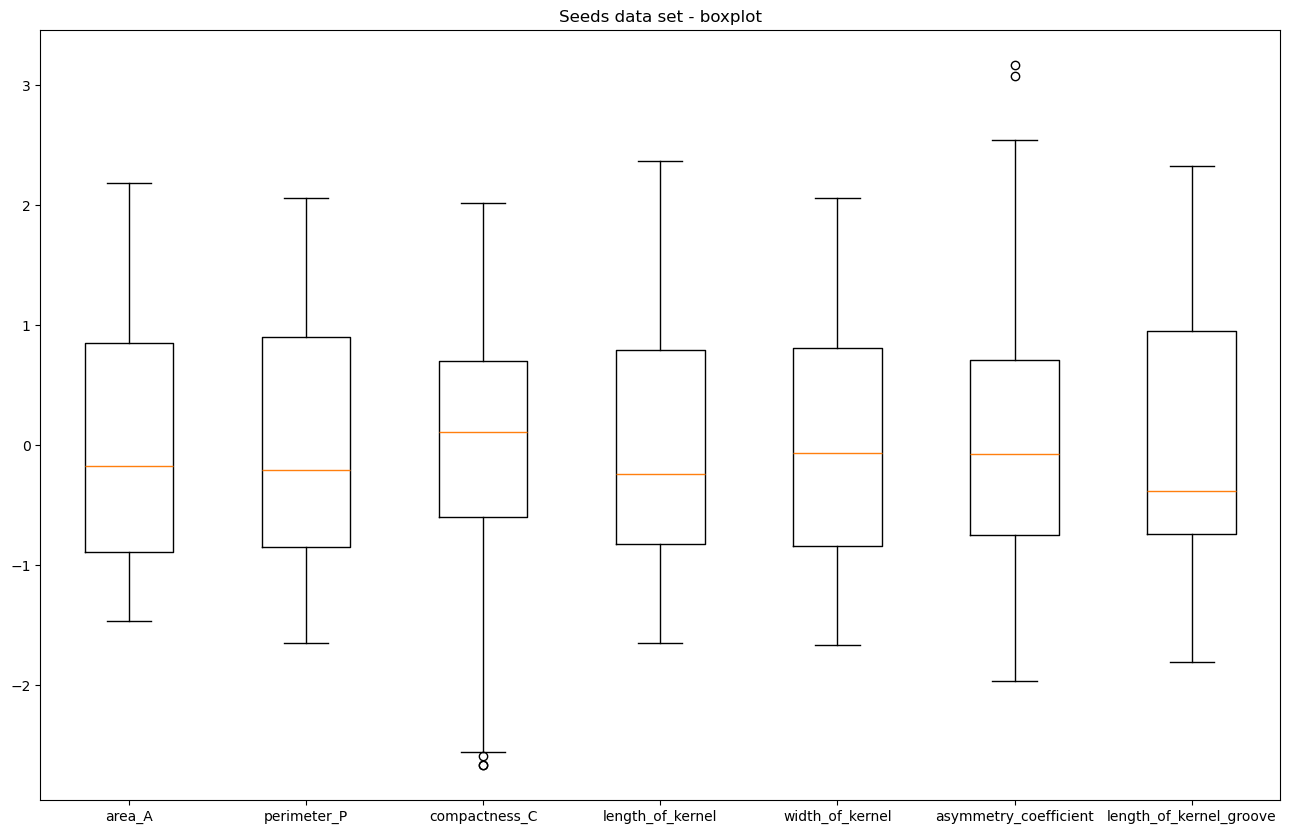

In [142]:
plt.figure(figsize=(16, 10))
plt.boxplot(X_standardized[:, :-1])
plt.xticks(range(1, numData+1), attributeNames[:-1])
plt.title("Seeds data set - boxplot")
plt.savefig("images/boxplot.png")
plt.show()

### Box plot

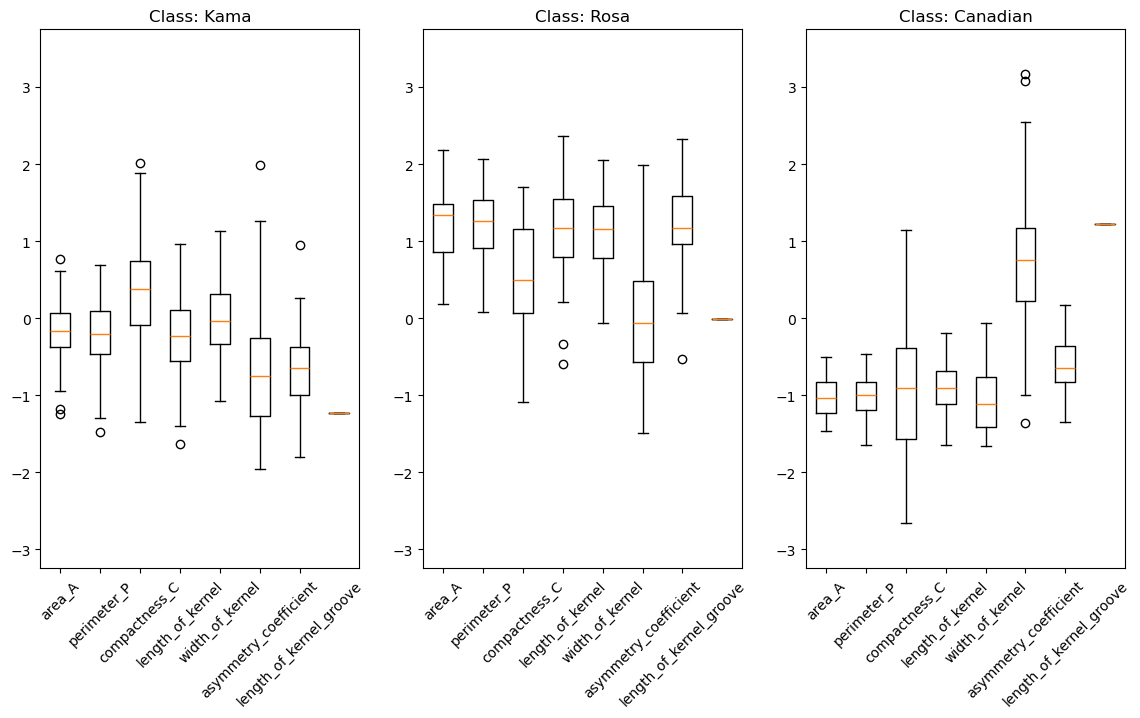

In [143]:
plt.figure(figsize=(14, 7))
for c in range(C):
    plt.subplot(1, C, c + 1)
    class_mask = y == c
    plt.boxplot(X_standardized[class_mask, :])
    plt.title("Class: " + classNames[c])
    plt.xticks(range(1, numData + 1), attributeNames[:-1], rotation=45)
    y_up = X_standardized.max() + (X_standardized.max() - X_standardized.min()) * 0.1
    y_down = X_standardized.min() - (X_standardized.max() - X_standardized.min()) * 0.1
    plt.ylim(y_down, y_up)

plt.savefig("images/boxplt_classes.png")
plt.show()

## PCA on Seeds dataset

In [144]:
# Remove the labels from the dataset because they should not be factored into PCA analysis
X_no_label = X_standardized[:, :-1]
X_no_label.shape

(209, 7)

In [145]:
# Subtract

Y = X_no_label - np.ones((N, 1)) * X_no_label.mean(axis=0)
# SVD
U, S, Vh = np.linalg.svd(Y, full_matrices=False)
principal_components = Vh.T
principal_components

array([[-0.44448679,  0.02633724, -0.02538618,  0.1935727 , -0.20458023,
         0.42660398,  0.73469652],
       [-0.44159804,  0.08347532,  0.0602252 ,  0.29543045, -0.17453529,
         0.47597985, -0.67089301],
       [-0.27693121, -0.52822551, -0.63086816, -0.33244187,  0.33237527,
         0.14159154, -0.07247895],
       [-0.42364302,  0.20515563,  0.21209524,  0.26383132,  0.76610837,
        -0.27346471,  0.04627564],
       [-0.43284046, -0.11660298, -0.21598262,  0.19923673, -0.46558215,
        -0.70315108, -0.03899907],
       [ 0.11788973,  0.7181042 , -0.67831231,  0.09295845,  0.03585216,
         0.01950615, -0.00369293],
       [-0.38731062,  0.37677222,  0.2144606 , -0.80423215, -0.1106205 ,
        -0.0426518 , -0.03456014]])

### Plot of all principal directions

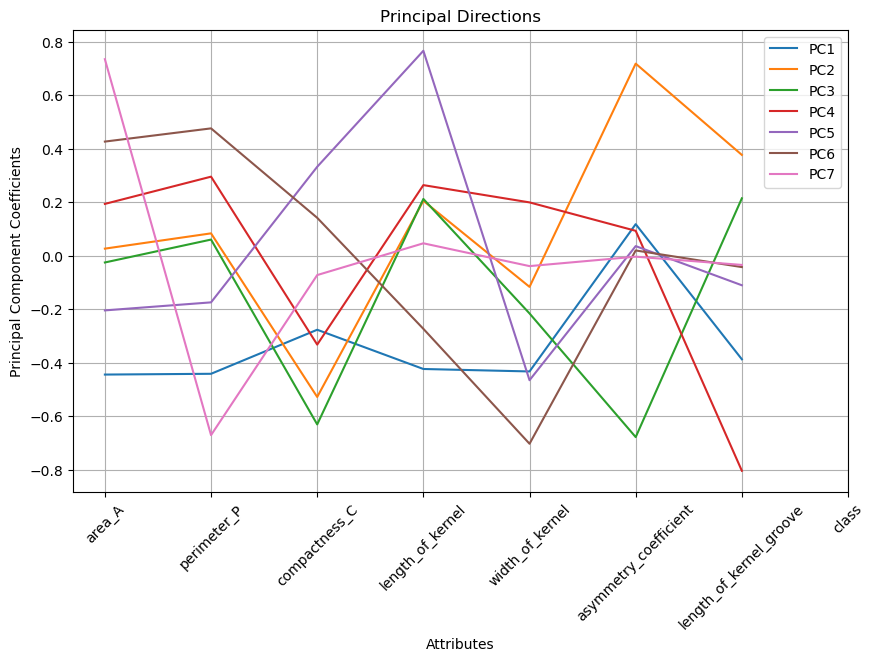

In [146]:
# Plot principal components
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(principal_components.shape[1]):
    ax.plot(principal_components[:, i], label=f"PC{i+1}")
ax.set_title("Principal Directions")
ax.set_xlabel("Attributes")
ax.set_ylabel("Principal Component Coefficients")
ax.legend()
plt.xticks(range(num_attributes), attributeNames, rotation=45)
plt.grid()
plt.savefig("images/principaldirections.png")
plt.show()

### A plot of the amount of variance explained as a function of the number of PCA components included

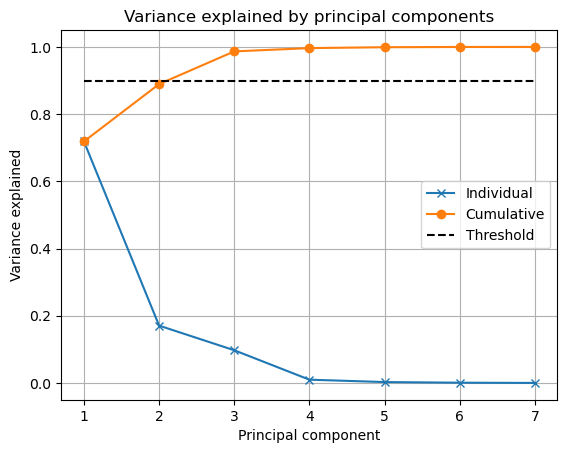

In [147]:
rho = (S * S) / (S * S).sum()

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.savefig("images/variancetallied.png")
plt.show()

First three principal components explains more than 90% variance of the data

### Table of component coefficients

[0 1 2 3 4 5 6]


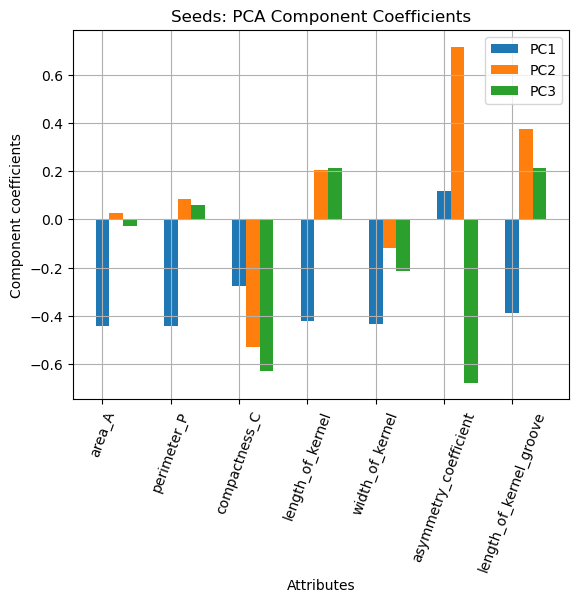

In [148]:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
box_width = 0.2
r = np.arange(0, M - 1)
print(r)
for i in pcs:
    plt.bar(r + i * box_width, principal_components[:, i], width=box_width)

plt.xticks(r, attributeNames[:-1], rotation=70)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Seeds: PCA Component Coefficients")
plt.savefig("images/PCAcoefficients.png")
plt.show()

### Projection of first two components

In [149]:
X_standardized[:, :-1].shape, principal_components.shape

((209, 7), (7, 7))

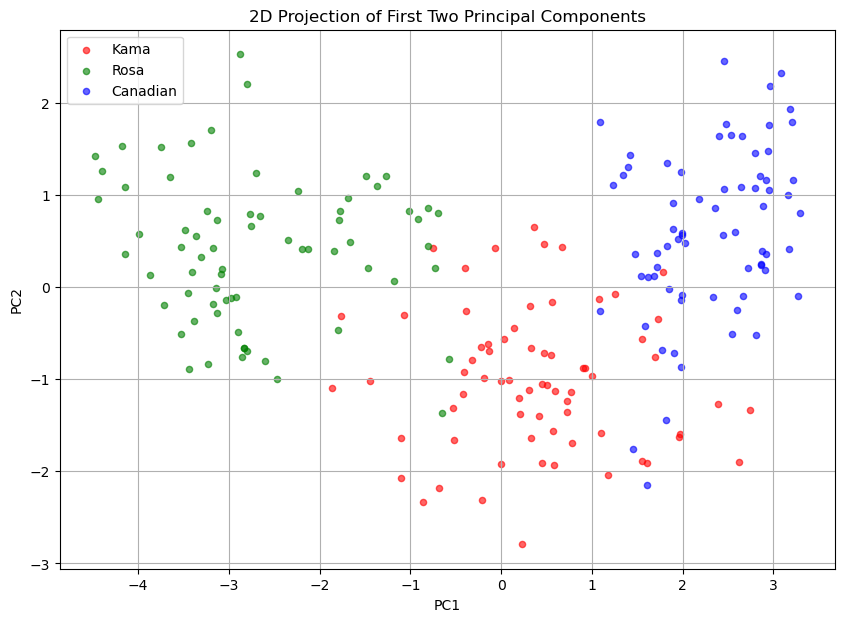

In [150]:
# Project data onto first two principal components
X_pca = X_standardized[:, :-1] @ principal_components[:, :2]

# Plot 2D projection
fig, ax = plt.subplots(figsize=(10, 7))
for c, color in zip(range(3), colors):
    mask = y == c
    ax.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=classNames[c],
        color=color,
        alpha=0.6,
        s=20,
    )
ax.set_title("2D Projection of First Two Principal Components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()
plt.grid()
plt.savefig("images/pca2d.png")
plt.show()

### The data projected onto the first three principal components

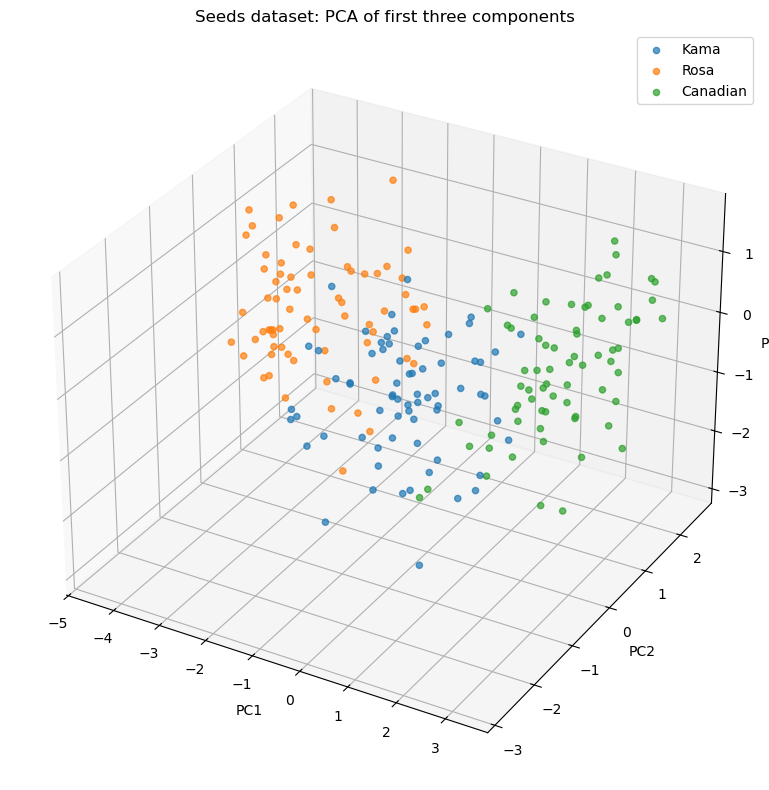

In [151]:
# Project the centered data onto the principle component space
Z = np.dot(Y, principal_components)
# Add back class labels for dataset
figure = plt.figure(figsize=(10, 8))
ax = figure.add_subplot(projection='3d')
plt.title("Seeds dataset: PCA of first three components")
for c in range(C):
    class_mask = y == c
    ax.scatter(Z[class_mask, 0], Z[class_mask, 1], Z[class_mask, 2], "o", alpha=0.7)
ax.legend(classNames)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.savefig("images/pca3d.png")
plt.show()

Before standardization: The attribute with the highest standard deviation will dominate the PCA results because PCA is sensitive to the scale of the data. This attribute will likely have a large magnitude in the attribute coefficients (loadings) of the principal components.

After standardization: All attributes will have the same scale (mean = 0, standard deviation = 1). The attribute with the highest standard deviation will no longer dominate, and its contribution to the principal components will be more balanced with the other attributes.

Changes in direction and magnitude:

The direction of the attribute coefficients may change because the relative importance of the attributes is reweighted.

The magnitude of the coefficients for the previously dominant attribute will decrease after standardization.

Before standardization: The principal components will likely explain a large proportion of the variance in the dominant attribute, but this may not reflect the true structure of the data.

After standardization: The variance explained by the principal components will be more evenly distributed across all attributes, providing a more balanced representation of the data.